In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

In [13]:
df=pd.read_csv('USArrests.csv')
df.index= df.iloc[:,0]
df = df.iloc[:,1:5]
del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [19]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [20]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

clusters = dbscan_cluster.fit_predict(df_std)

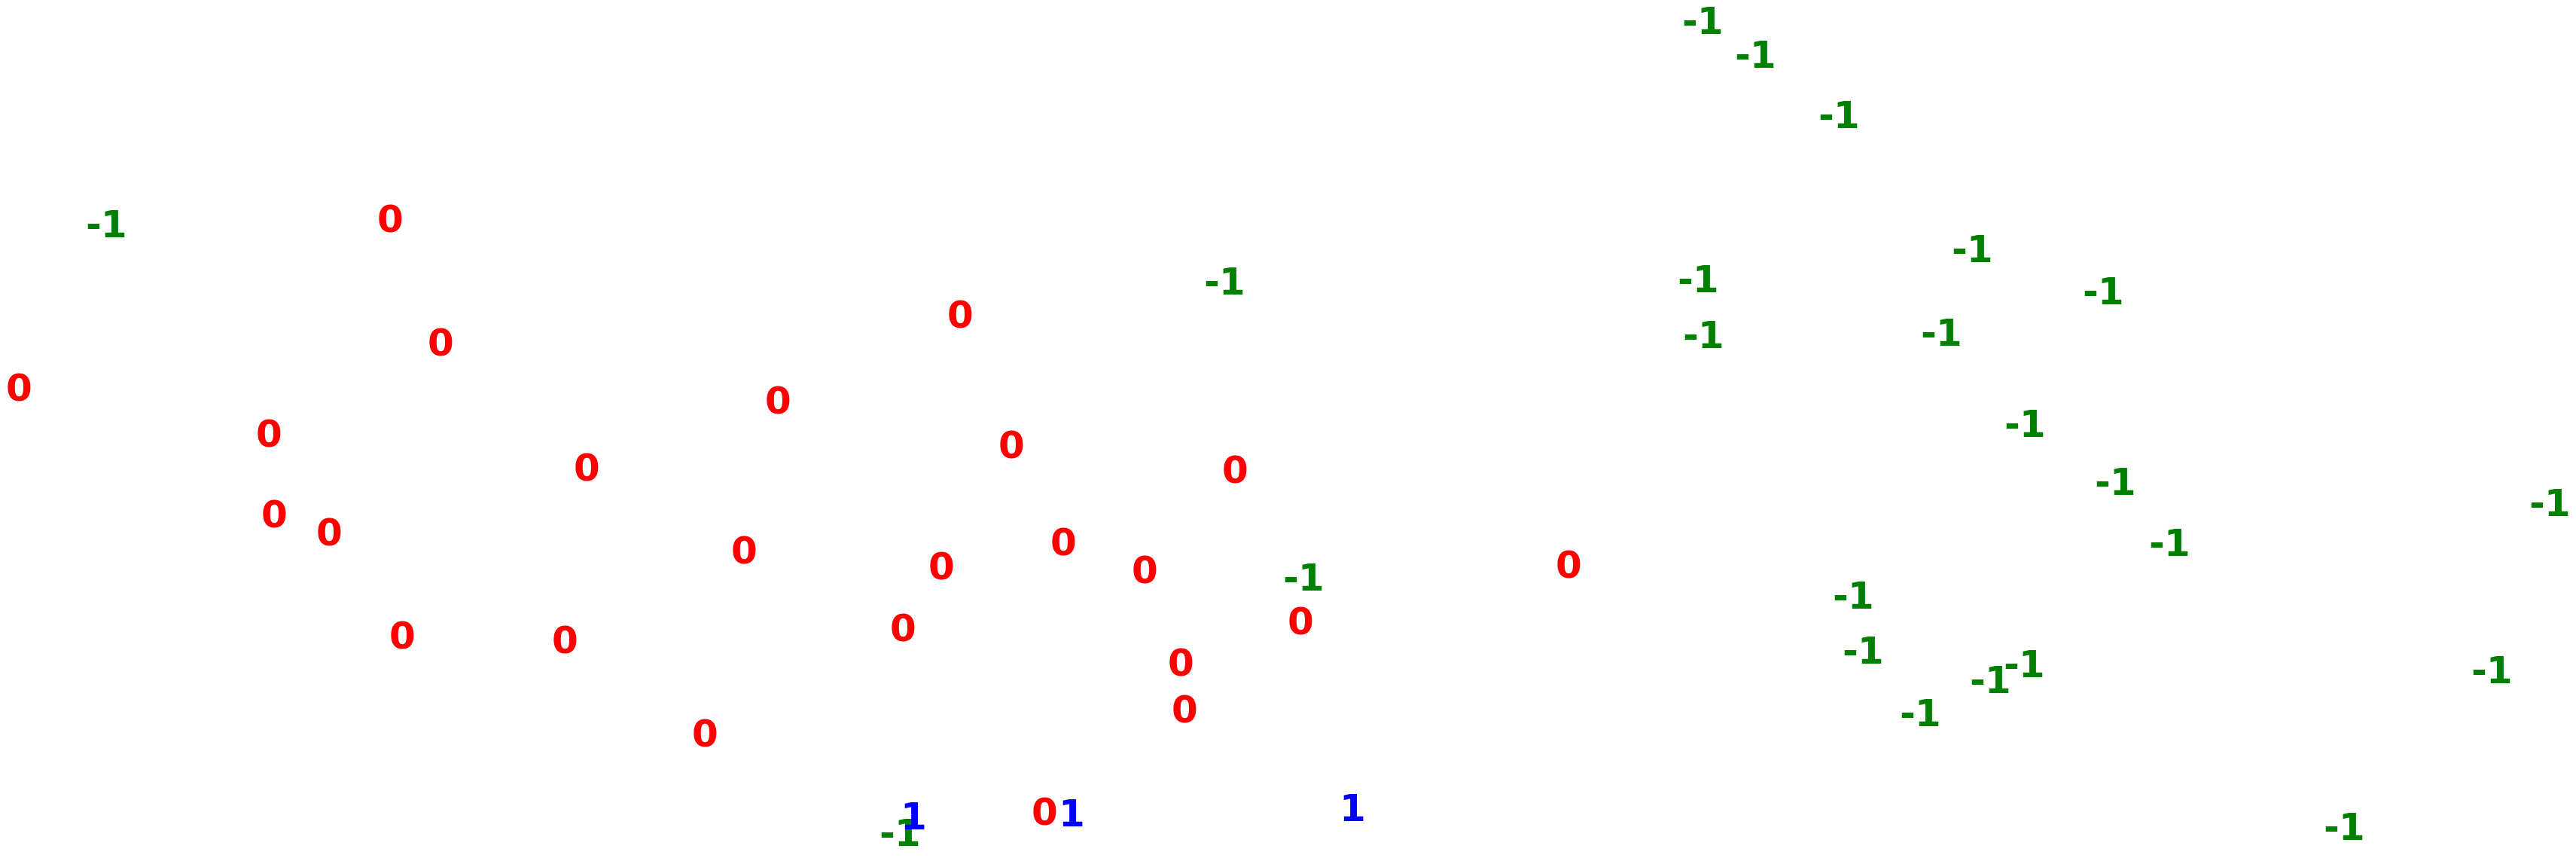

In [34]:
pca = PCA(n_components=2).fit_transform(df_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [42]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(df_std, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: 0.19486631995858558


In [67]:
dbscan_cluster = DBSCAN(eps=1, min_samples=4, metric="euclidean")

clusters = dbscan_cluster.fit_predict(df_std)

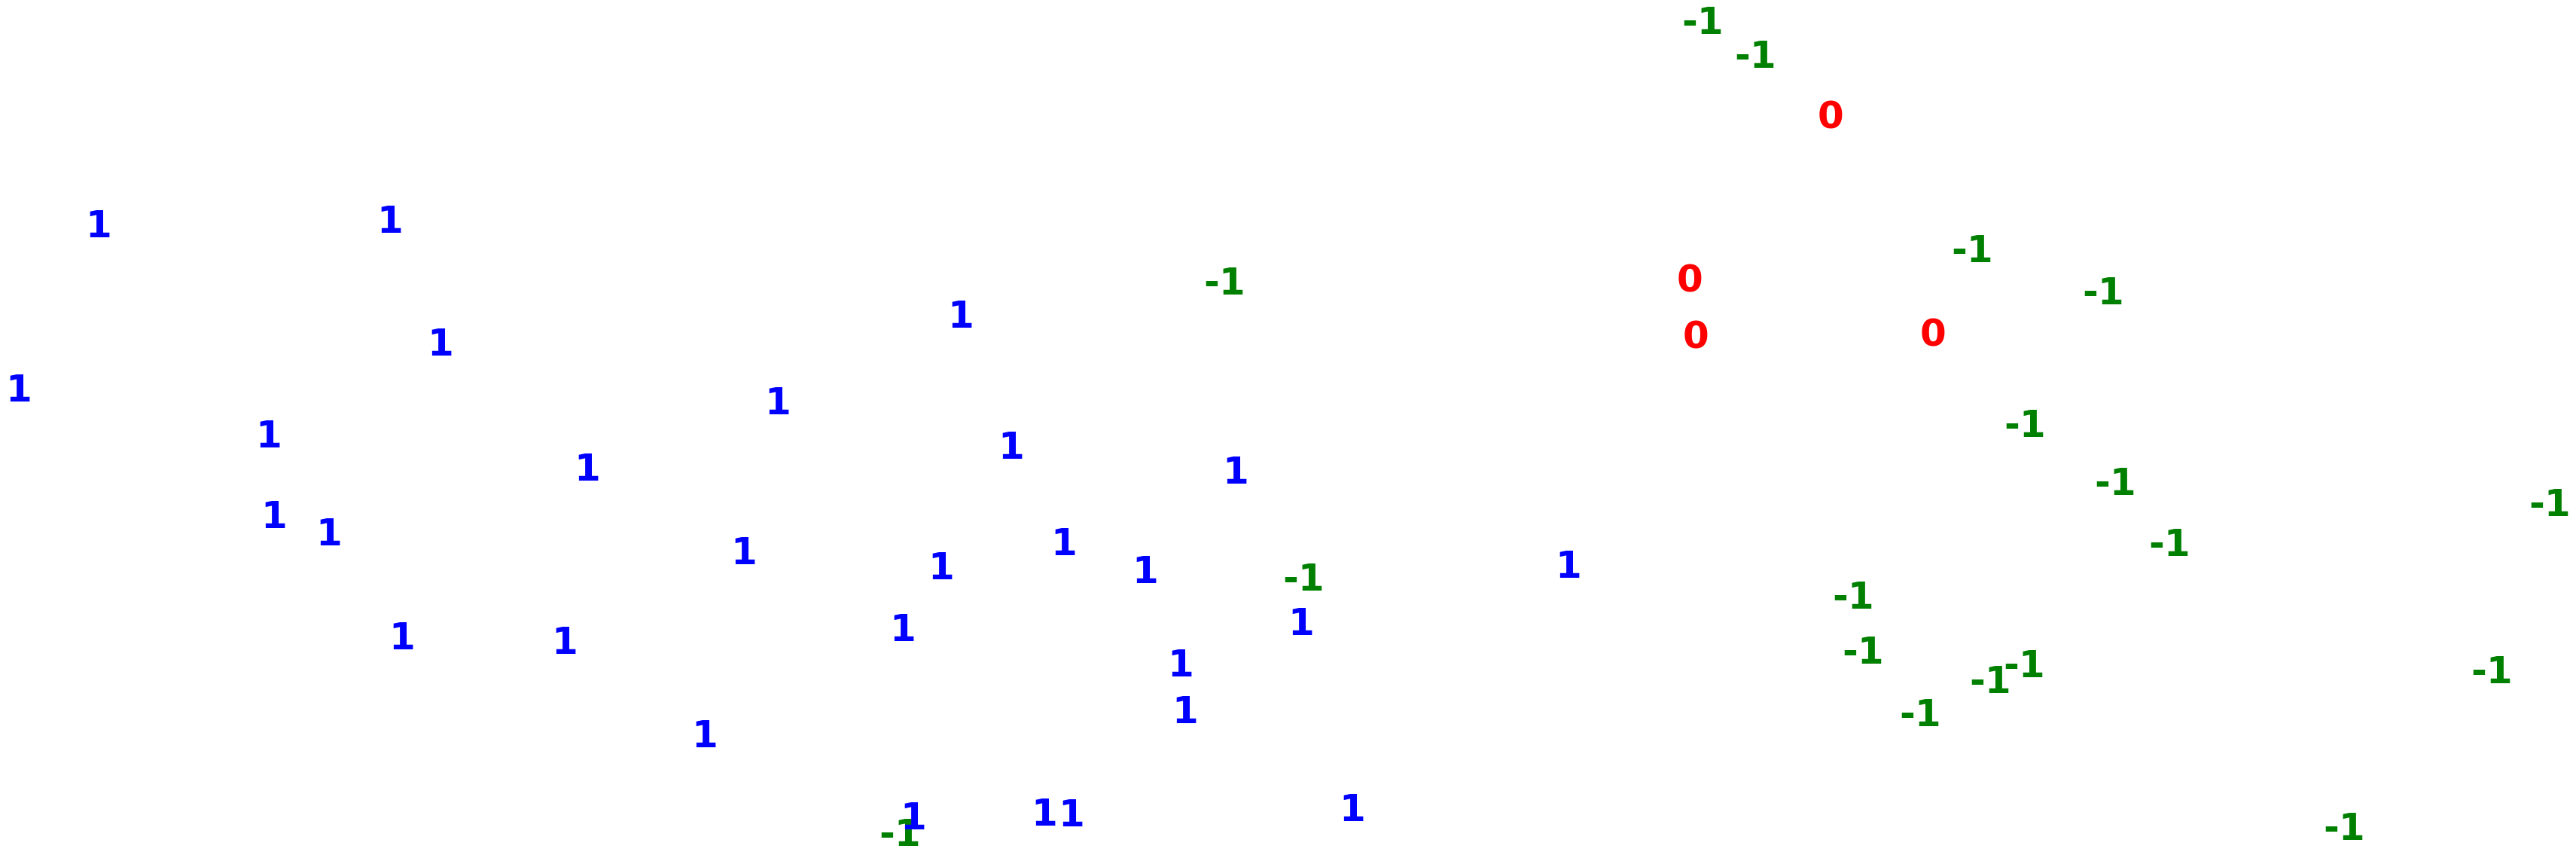

In [68]:
pca = PCA(n_components=2).fit_transform(df_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

- DBSCAN, küme sayısını belirtmemizi gerektirmez.
- DBSCAN, herhangi bir şekle sahip kümeleri bulabilir.
- DBSCAN oldukça efektiftir ve veriyi daha iyi ölçekler.
- DBSCAN, verilerdeki aykırı değerleri tanımlayabilir; böylece aykırı değerlerden fazla etkilenmez.

# DBSCAN nedir?

DBSCAN, adından da anlaşılacağı gibi, yoğunluğa dayalı bir kümeleme algoritmasıdır. Buradaki yoğunluk tanımı, bir kümedeki veri noktalarının yğunlaşması ve yakınlığını ifade etmektedir. Kısaca, DBSCAN, gözlemleri yüksek yoğunluklu bölgelerin alt gruplarına ayırır.

DBSCAN algoritmasını uygularken küme sayısını belirtmemiz gerekmemekte ancak iki hiperparametreyi ayarlamamız lazım:

- epsilon (ϵ) : Yakındaki komşuların aranacağı yarıçapı tanımlar. Her veri noktasının etrafına çizilen ϵ
  yarıçapında bir daire olduğunu hayal edebiliriz.

- minPts: Küme oluşturmak için gereken minimum nokta sayısıdır.